In [1]:
import numpy as np
import mip as mp
import matplotlib.pyplot as plt
import math

In [2]:
m = mp.Model()

A = m.add_var(name='Camisas', var_type=mp.CONTINUOUS)
B = m.add_var(name='Blusas', var_type=mp.CONTINUOUS)

m.objective = mp.maximize(8 * A + 12 * B)

m += A * 20 + B * 60 <= 25 * 5 * 8 * 60
m += A * 70 + B * 60 <= 35 * 5 * 8 * 60
m += A * 12 + B * 4 <= 5 * 5 * 8 * 60

m.optimize()

Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Oct 24 2021 

Starting solution of the Linear programming problem using Primal Simplex

Coin0506I Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
Clp1000I sum of infeasibilities 0 - average 0, 0 fixed columns
Coin0506I Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
Clp0029I End of values pass after 2 iterations
Clp0000I Optimal - objective value 13920
Clp0000I Optimal - objective value 13920
Clp0000I Optimal - objective value 13920


<OptimizationStatus.OPTIMAL: 0>

Clp0032I Optimal objective 13920 - 0 iterations time 0.002, Idiot 0.00


In [3]:
print(f"Produção de Camisas: {A.x:.0f}")
print(f"Produção de Blusas: {B.x:.0f}")
print(f"Max return: {math.floor(m.objective_value)}")

Produção de Camisas: 480
Produção de Blusas: 840
Max return: 13920


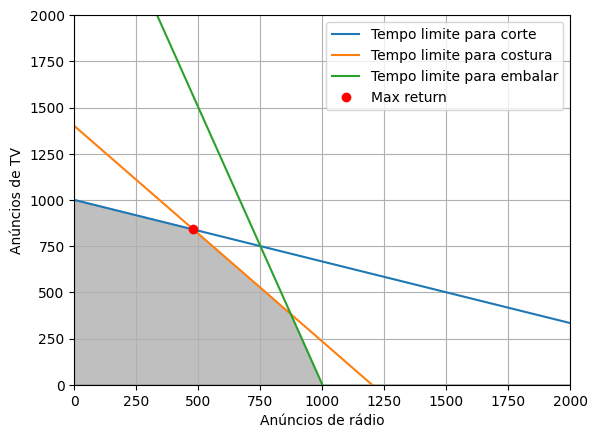

In [10]:
x = np.linspace(0, 2000, 200)

r1 = (25 * 5 * 8 * 60 - 20 * x) / 60
plt.plot(x, r1, label="Tempo limite para corte")

r2 = (35 * 5 * 8 * 60 - 70 * x) / 60
plt.plot(x, r2, label="Tempo limite para costura")

r3 = (5 * 5 * 8 * 60 - 12 * x) / 4
plt.plot(x, r3, label="Tempo limite para embalar")

plt.xlim(0, 2000)
plt.ylim(0, 2000)

plt.xlabel("Anúncios de rádio")
plt.ylabel("Anúncios de TV")
plt.plot(A.x, B.x, 'ro', label="Max return")
plt.fill_between(x, 0, np.minimum(np.minimum(r1, r2), r3), color='gray', alpha=0.5)

plt.grid()
plt.legend()
plt.show()